In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_dir = '/kaggle/input/files1/Malaria Cells/training_set'
test_dir = '/kaggle/input/files1/Malaria Cells/testing_set'

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(64, 64), batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(64, 64), batch_size=32, class_mode='binary')


Found 27558 images belonging to 2 classes.
Found 15832 images belonging to 2 classes.


In [4]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [6]:
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
862/862 [==============================] - 209s 243ms/step - loss: 0.1614 - accuracy: 0.9485 - val_loss: 0.1401 - val_accuracy: 0.9520
Epoch 2/10
862/862 [==============================] - 170s 197ms/step - loss: 0.1556 - accuracy: 0.9496 - val_loss: 0.1315 - val_accuracy: 0.9538
Epoch 3/10
862/862 [==============================] - 174s 201ms/step - loss: 0.1478 - accuracy: 0.9512 - val_loss: 0.1293 - val_accuracy: 0.9542
Epoch 4/10
862/862 [==============================] - 171s 198ms/step - loss: 0.1432 - accuracy: 0.9536 - val_loss: 0.1238 - val_accuracy: 0.9550
Epoch 5/10
862/862 [==============================] - 174s 202ms/step - loss: 0.1402 - accuracy: 0.9532 - val_loss: 0.1299 - val_accuracy: 0.9553
Epoch 6/10
862/862 [==============================] - 173s 201ms/step - loss: 0.1395 - accuracy: 0.9544 - val_loss: 0.1230 - val_accuracy: 0.9547
Epoch 7/10
862/862 [==============================] - 176s 205ms/step - loss: 0.1388 - accuracy: 0.9544 - val_loss: 0.1358 -

Text(0, 0.5, 'Loss')

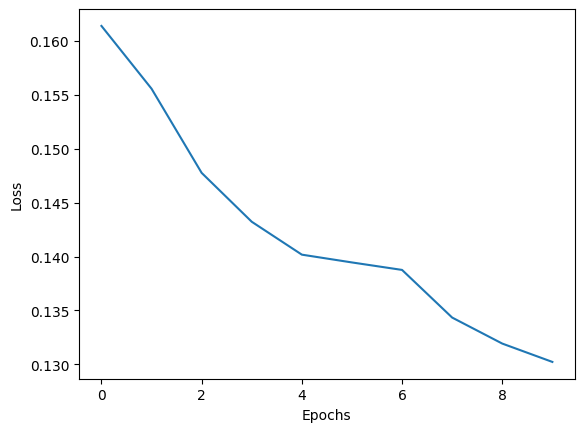

In [17]:
plt.plot(history.history['loss'])

plt.xlabel('Epochs')
plt.ylabel('Loss')

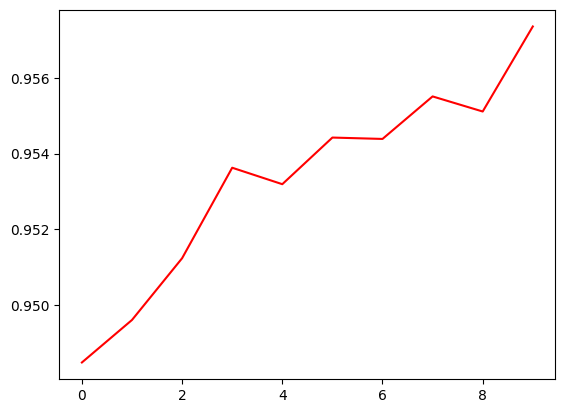

In [16]:
plt.plot(history.history['accuracy'],'r')

In [18]:
hist_df = pd.DataFrame(history.history) 

In [19]:
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.161411,0.948472,0.140058,0.951996
1,0.155581,0.949597,0.131506,0.953764
2,0.147769,0.951230,0.129255,0.954207
3,0.143233,0.953625,0.123781,0.954965
4,0.140179,0.953190,0.129874,0.955280
5,0.139456,0.954423,0.122967,0.954712
6,0.138762,0.954387,0.135827,0.953386
7,0.134340,0.955512,0.121515,0.956607
8,0.131925,0.955113,0.117983,0.957238
9,0.130222,0.957363,0.117878,0.956165


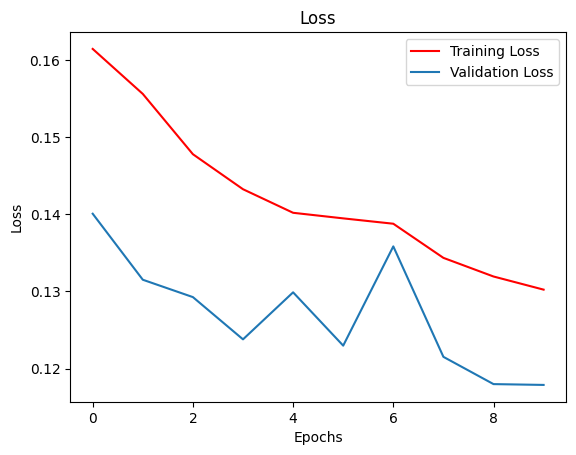

In [28]:
plt.plot(history.history['loss'],'r',label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

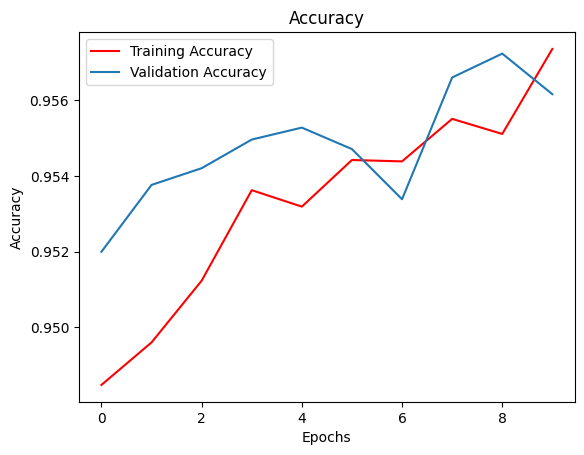

In [29]:
plt.plot(history.history['accuracy'],'r',label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

In [30]:
test_loss, test_acc = model.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

495/495 [==============================] - 49s 99ms/step - loss: 0.1179 - accuracy: 0.9562
Test Loss: 0.11787762492895126
Test Accuracy: 0.9561647176742554


In [46]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png'  # Path to the input image
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize pixel values between 0 and 1
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension



In [47]:
predictions = model.predict(img_array)
predictions =1-predictions
predicted_class = np.round(predictions).flatten()[0]


if predicted_class == 1:
    print("The image is predicted as infected with malaria")
else:
    print("The image is predicted as uninfected (non-malaria)..")


1/1 [==============================] - 0s 25ms/step
The image is predicted as infected with malaria


In [48]:
predictions,predicted_class

(array([[0.9955388]], dtype=float32), 1.0)